In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy
import itertools

import numpy as np
from scipy import linalg
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

from gmm_lbd import *
%matplotlib inline


### We load a dataset of ~150 samples / 5 components (4 motors + time) registered 3 times by demonstration with a right arm of a poppy-torso

In [2]:
manager2 = GmmManager(n_components_range=range(2, 5))
manager2.add_move('records/l_arm_2.record')
manager2.add_move('records/l_arm_3.record')
manager2.add_move('records/l_arm_4.record')
print manager2.datasets['r_arm_z'].shape, manager2.datasets.keys()


(462, 2) [u'r_arm_z', u'r_elbow_y', u'r_shoulder_x', u'r_shoulder_y']


We generate GMM of motors position referenced with the sample number

[(<matplotlib.axes._subplots.AxesSubplot at 0x7f986bfeb6d0>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f986be836d0>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f986bc31d50>, None)]

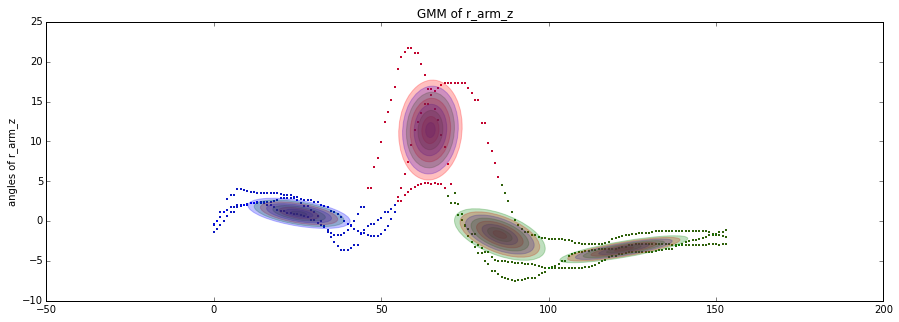

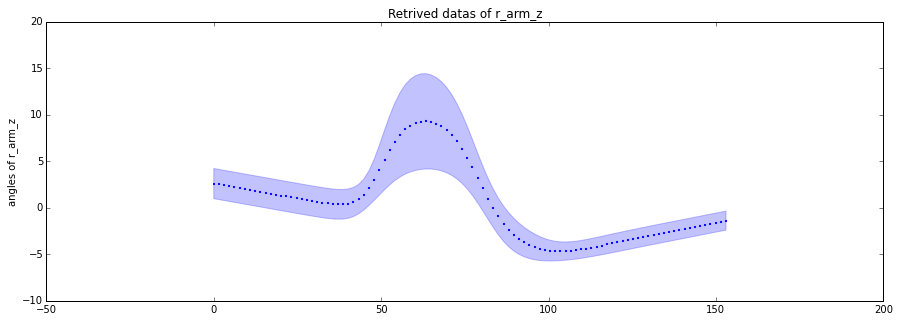

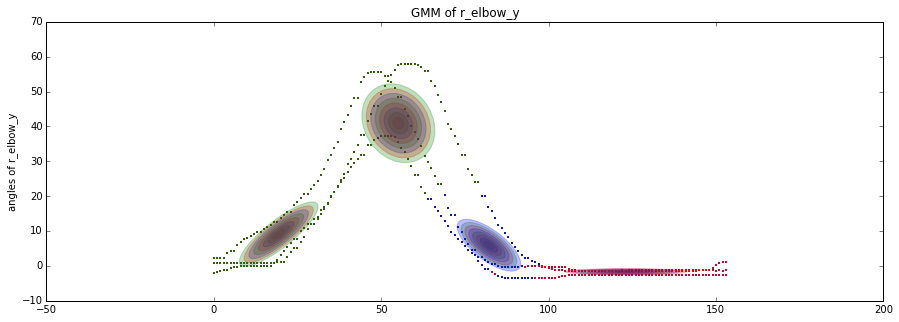

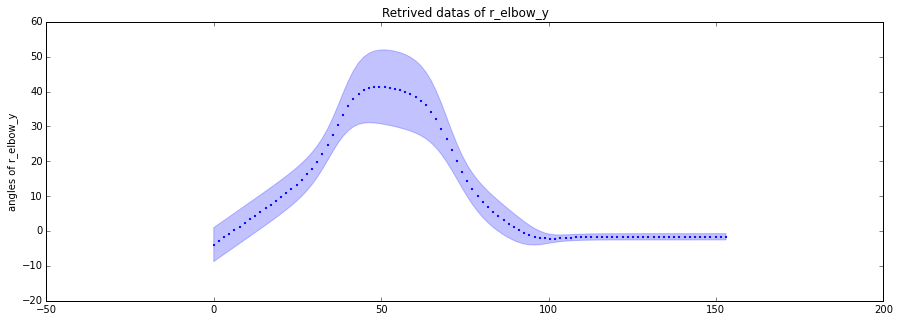

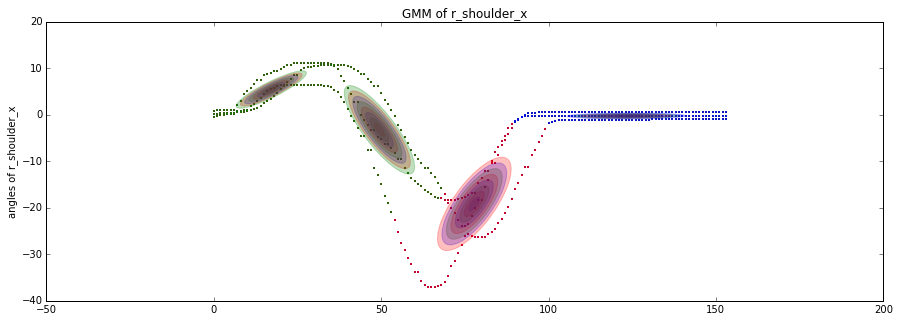

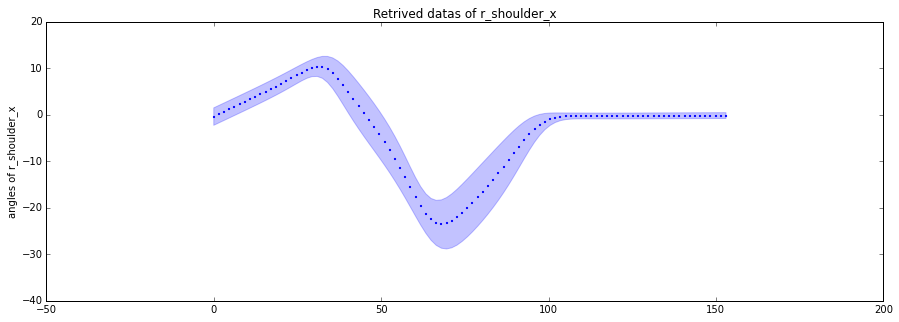

In [3]:
[(manager2.plot_ellipses_and_samples(key), manager2.plot_regression(key)) for key in manager2.datasets.keys()[:-1]]

## The same thing with another dataset:
These movements are too complex and far from each other to be welld represented by the GMM...

In [4]:
manager = GmmManager( n_components_range=range(2, 10))
manager.add_move('records/l_a_1.record')
manager.add_move('records/l_a_3.record')
manager.add_move('records/l_a_4.record')

print manager.datasets['r_arm_z'].shape, manager.datasets.keys()


(459, 2) [u'r_arm_z', u'r_elbow_y', u'r_shoulder_x', u'r_shoulder_y']


[(<matplotlib.axes._subplots.AxesSubplot at 0x7f989c32cfd0>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f986b422050>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f986b089550>, None)]

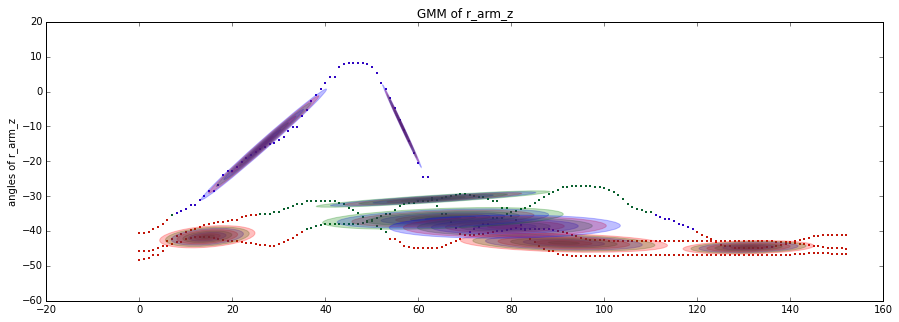

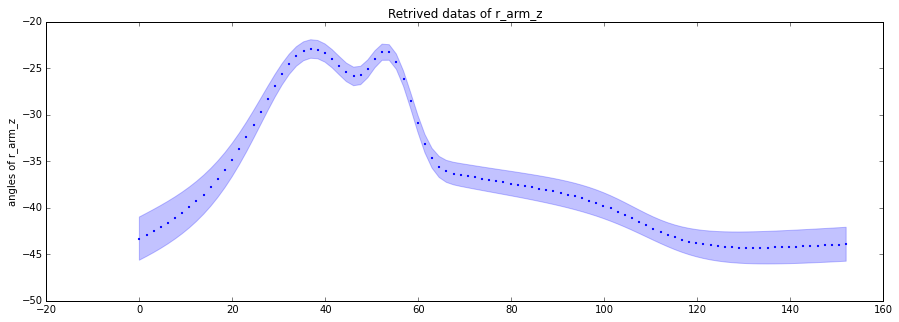

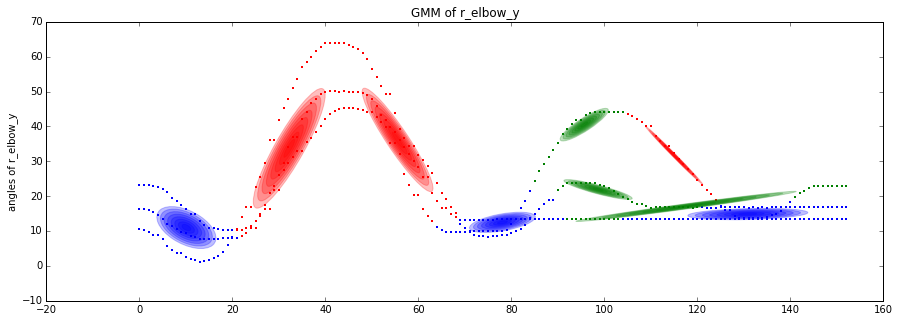

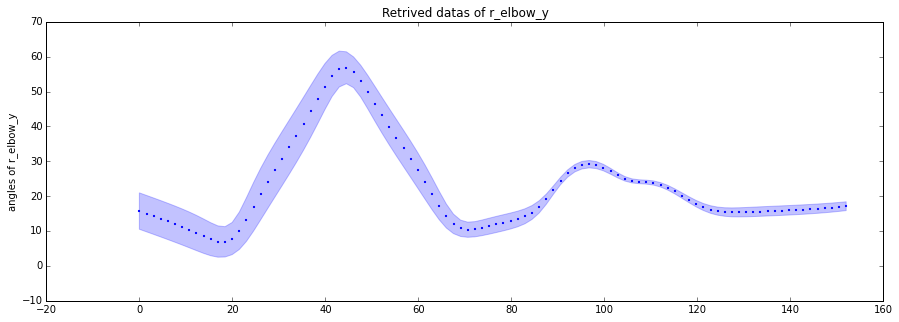

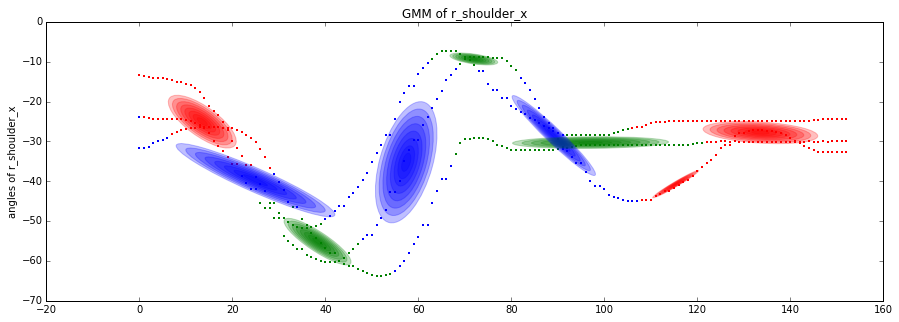

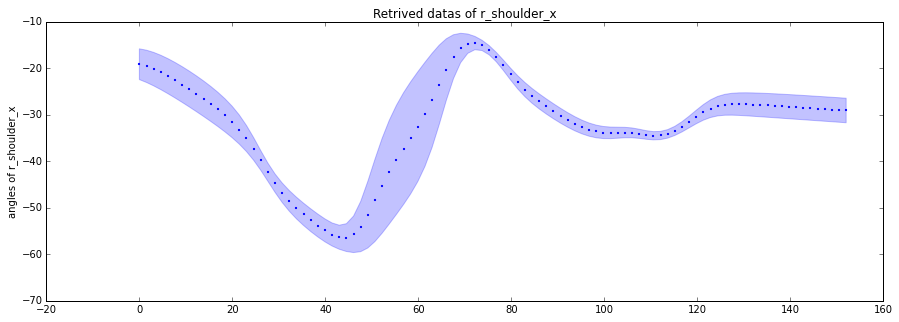

In [5]:
[(manager.plot_ellipses_and_samples(key), manager.plot_regression(key)) for key in manager.datasets.keys()[:-1]]